# import

In [343]:
import pandas as pd
import numpy as np
from emgineer import EmgDecomposition, plot_spikes
import matplotlib.pyplot as plt

In [344]:
df = pd.read_csv(
    'G:\共有ドライブ\MFG\project\Biomedical engineering\Project プロジェクト\Bionic hand\EMG実験/1016wei/five1.csv',
    header=None)

In [345]:
df.shape

(128, 71009)

In [346]:
df_use = df.T.iloc[2000:, :64]

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

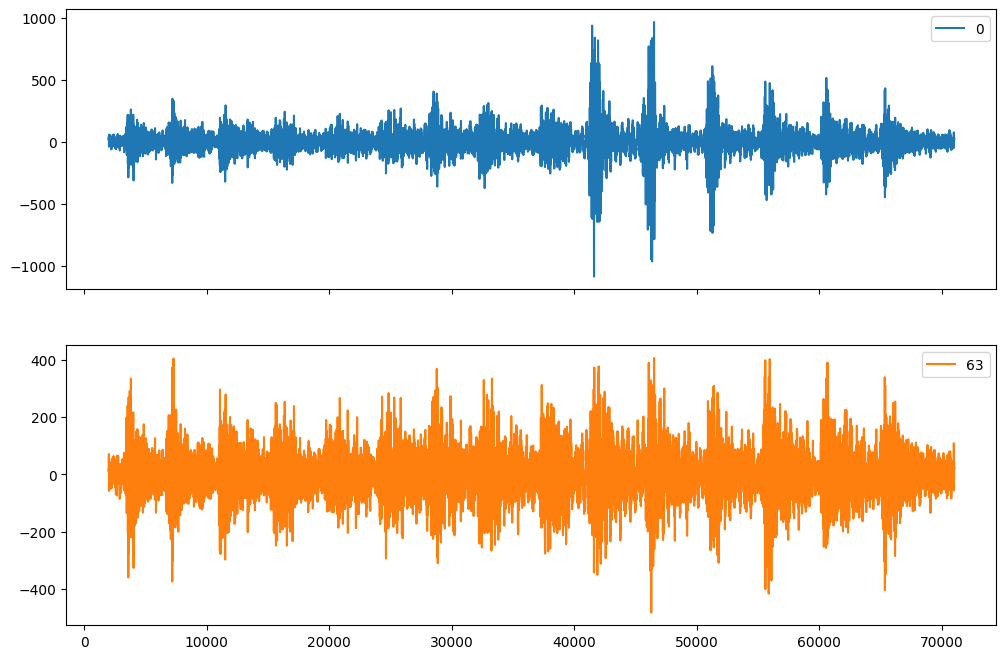

In [347]:
df_use.iloc[:, [0, 63]].plot(subplots=True)

# NMF

In [386]:
df_rms = df_use.pow(2).rolling(300).mean().apply(np.sqrt, raw=True).dropna()

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

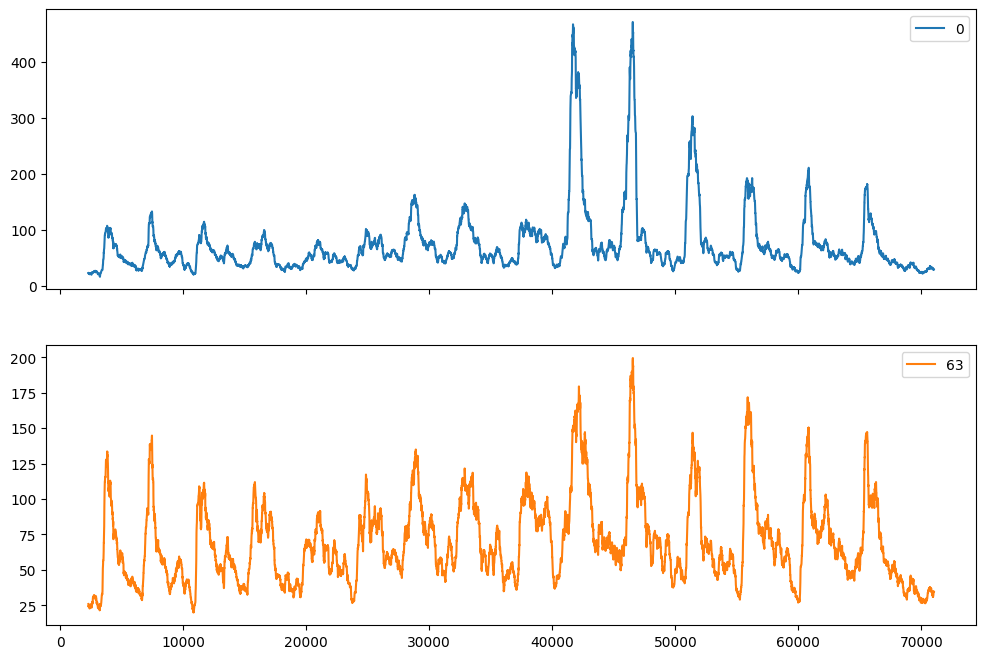

In [469]:
df_rms.iloc[:, [0, 63]].plot(subplots=True)

In [451]:
from sklearn.decomposition import NMF

n_conpoments = 20
nmf = NMF(n_components=n_conpoments, random_state=0, max_iter=1000, init='nndsvd')
nmf.fit(df_rms)
W = nmf.transform(df_rms)

est = EmgDecomposition(-1)
st_nmf = est._EmgMu2spikeTrain(W)


c:\Users\naoki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


## 可視化

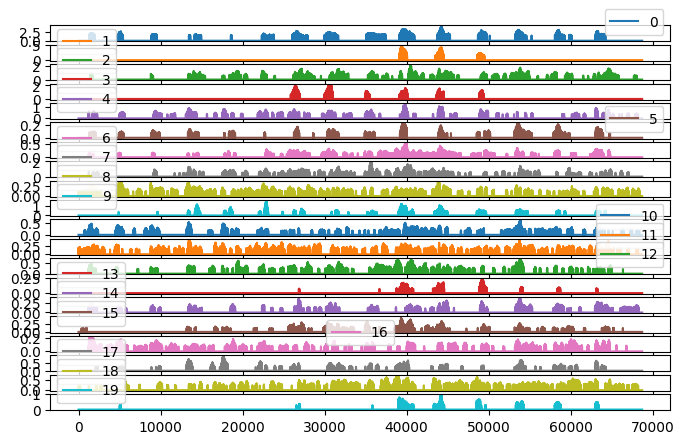

In [452]:
plt.rcParams['figure.figsize'] = (8.0, 5.0)
_ = pd.DataFrame(W*st_nmf).plot(subplots=True)

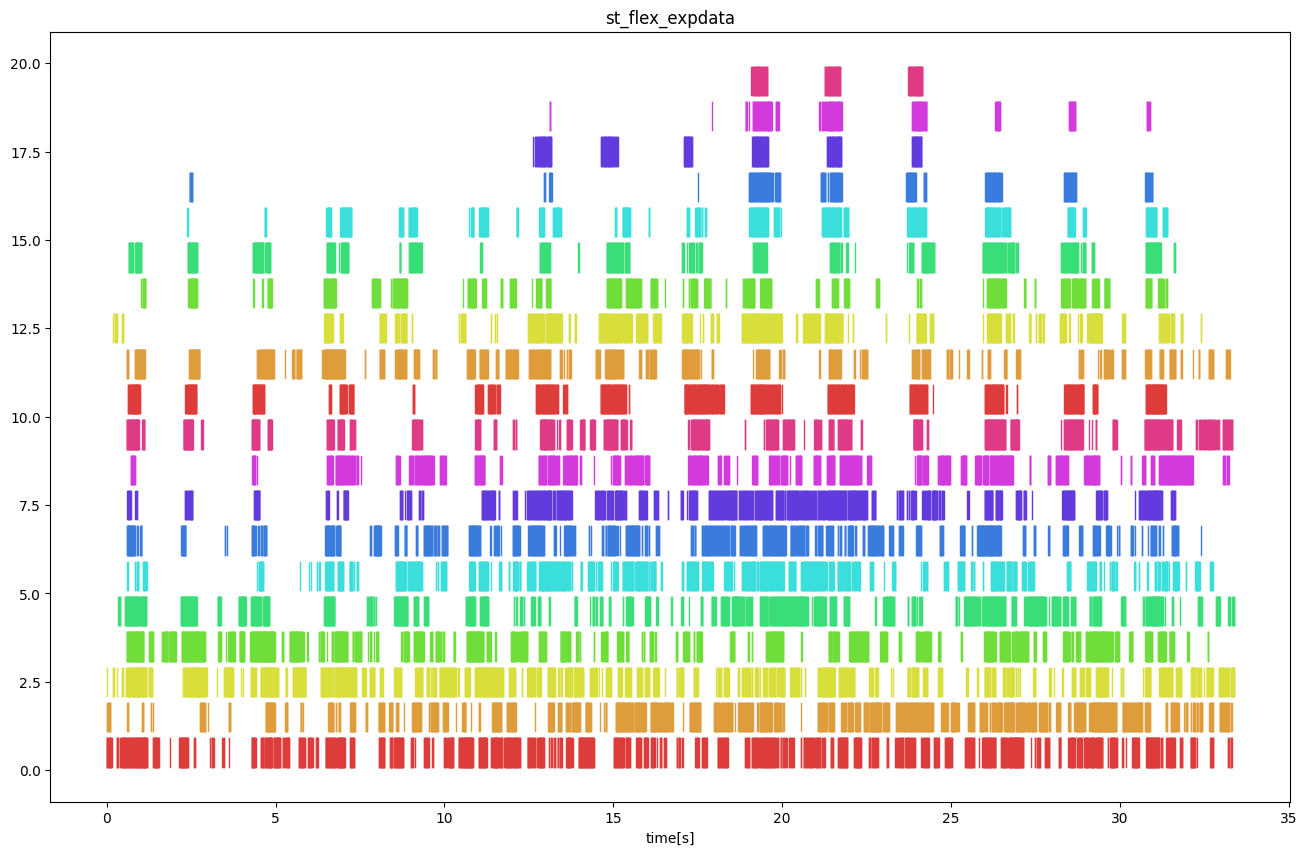

In [504]:
st_nmf_sorted = st_nmf[:, np.argsort(st_nmf.sum(axis=0))[::-1]]
plot_spikes(st_nmf_sorted, title='st_flex_expdata')

<Figure size 1200x800 with 0 Axes>

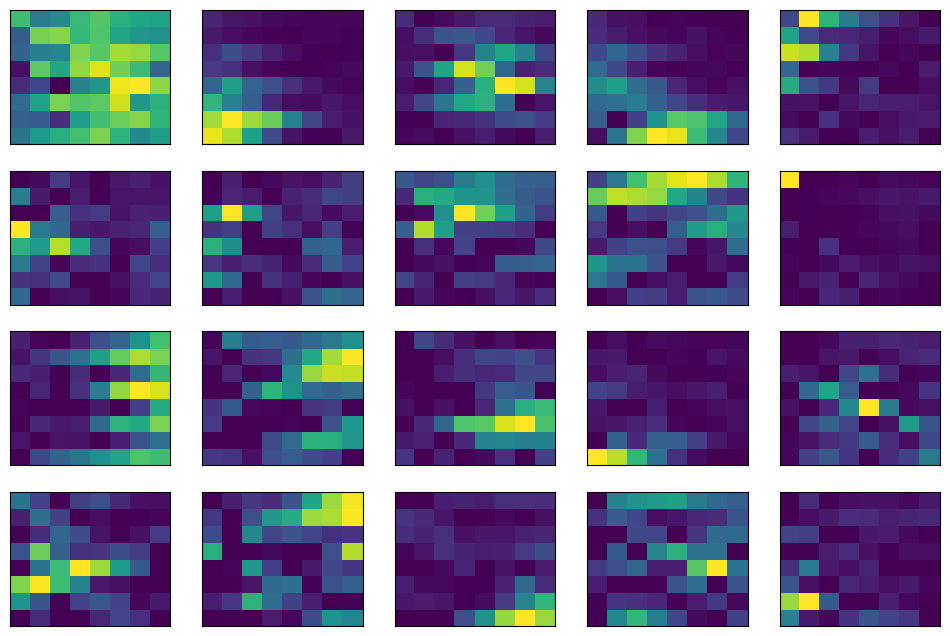

In [506]:
H = nmf.components_

n_comp = H.shape[0]

plt.rcParams['figure.figsize'] = (12.0, 8.0)
fig = plt.figure()
fig, axes = plt.subplots(nrows=-(-n_comp//5), ncols=5, sharex=False)
for i in range(n_comp):
    _electrodes = H[i].reshape((8, 8))
    axes[i//5, i%5].pcolor(_electrodes)
    axes[i//5, i%5].tick_params(
        labelbottom=False,
        labelleft=False,
        labelright=False,
        labeltop=False,
        bottom=False,
        left=False,
        right=False,
        top=False)

<Figure size 1200x800 with 0 Axes>

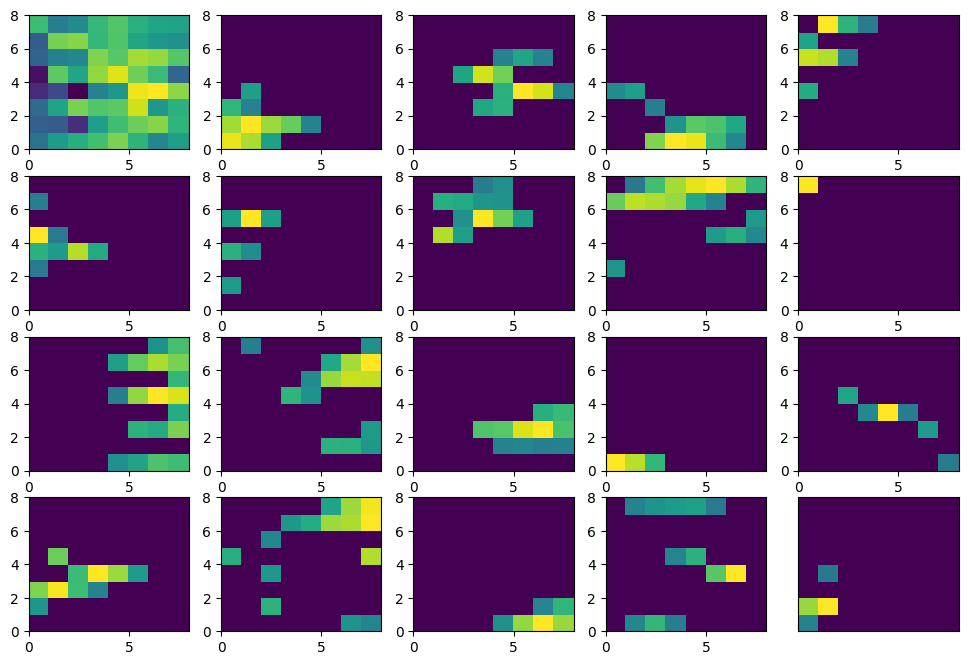

In [468]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
fig = plt.figure()
fig, axes = plt.subplots(nrows=-(-n_comp//5), ncols=5, sharex=False)
for j in range(n_comp):
    basis = H[j].reshape((8, 8))

    axes[j//5, j%5].pcolor((basis > basis.max() * 0.4) *basis)
    axes[i//5, i%5].tick_params(
        labelbottom=False,
        labelleft=False,
        labelright=False,
        labeltop=False,
        bottom=False,
        left=False,
        right=False,
        top=False)

## ほかのデータに適用

In [457]:
df_2 = pd.read_csv(
    'G:\共有ドライブ\MFG\project\Biomedical engineering\Project プロジェクト\Bionic hand\EMG実験/1016wei/five2.csv',
    header=None)

In [458]:
df_2_use = df_2.T.iloc[2000:, :64]
df_2_rms = df_2_use.pow(2).rolling(300).mean().apply(np.sqrt, raw=True).dropna()
W_2 = nmf.transform(df_2_rms)
st_2_nmf = est._EmgMu2spikeTrain(W_2)

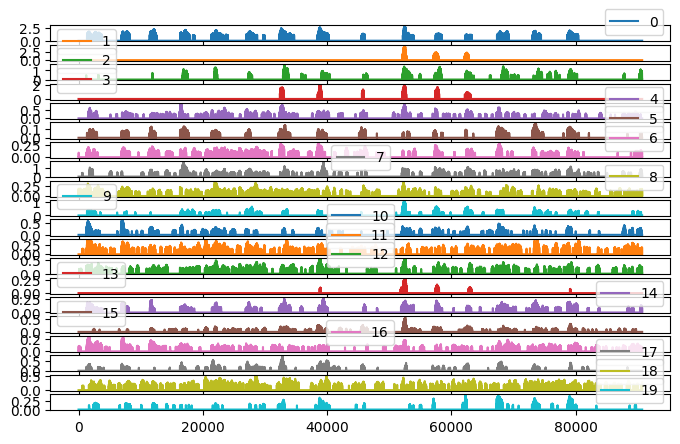

In [459]:
plt.rcParams['figure.figsize'] = (8.0, 5.0)
_ = pd.DataFrame(W_2*st_2_nmf).iloc[:, :20].plot(subplots=True)

# ICA

In [358]:
emg_flex = df_use.values

est_flex = EmgDecomposition(
    n_motor_unit=40,
    n_delayed=8,
    random_state=0,
    cashe='1016wei_five1_flex',
    flag_sil=False,
    flag_pca=False)
est_flex.fit(emg_flex)
st_flex, mu_flex = est_flex.transform(emg_flex)

<Figure size 1600x1000 with 0 Axes>

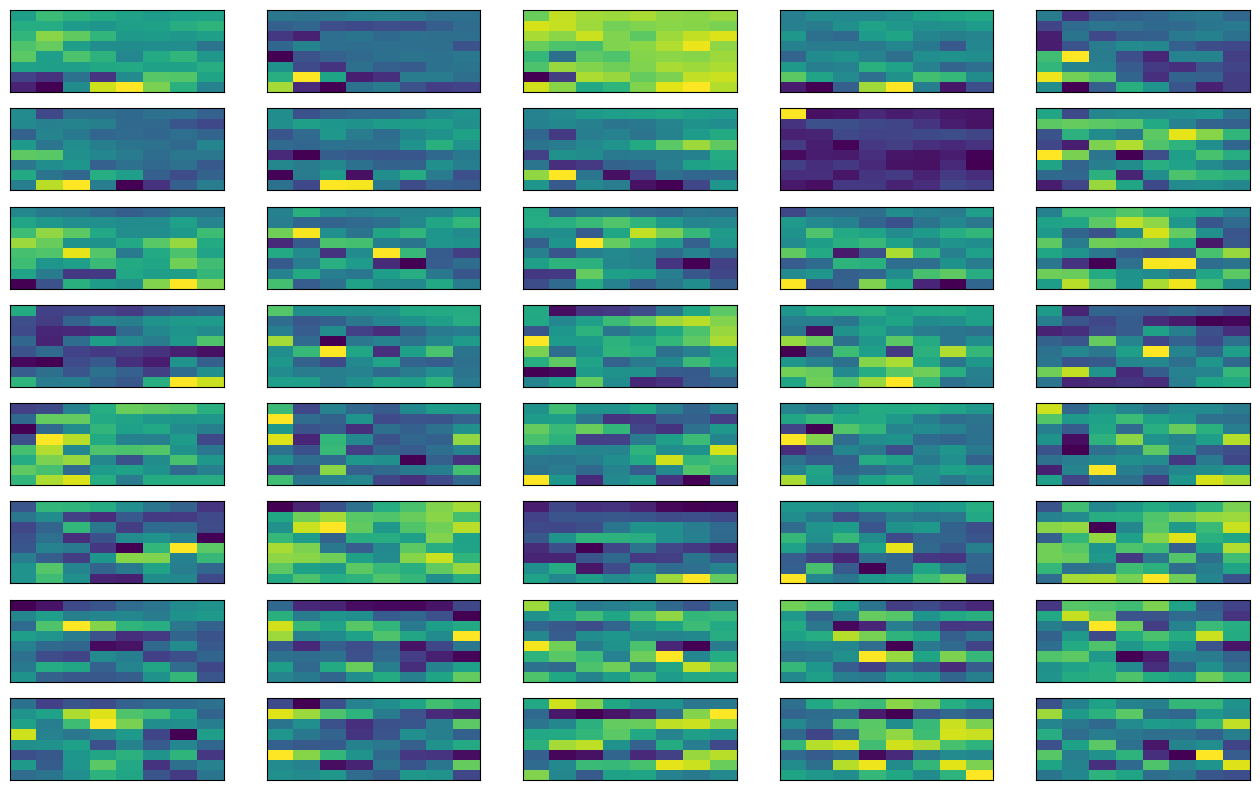

In [478]:
C = est_flex._FastICA.components_
n_comp = C.shape[0]
#C_tmp = C.reshape((n_comp, 64, -1)).sum(axis=2)
#print(C_tmp.shape)

plt.rcParams['figure.figsize'] = (16.0, 10.0)
fig = plt.figure()
fig, axes = plt.subplots(nrows=-(-n_comp//5), ncols=5, sharex=False)
for i in range(n_comp):
    _electrodes = C[i, :64].reshape((8, 8))
    axes[i//5, i%5].pcolor(_electrodes)
    axes[i//5, i%5].tick_params(
        labelbottom=False,
        labelleft=False,
        labelright=False,
        labeltop=False,
        bottom=False,
        left=False,
        right=False,
        top=False)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

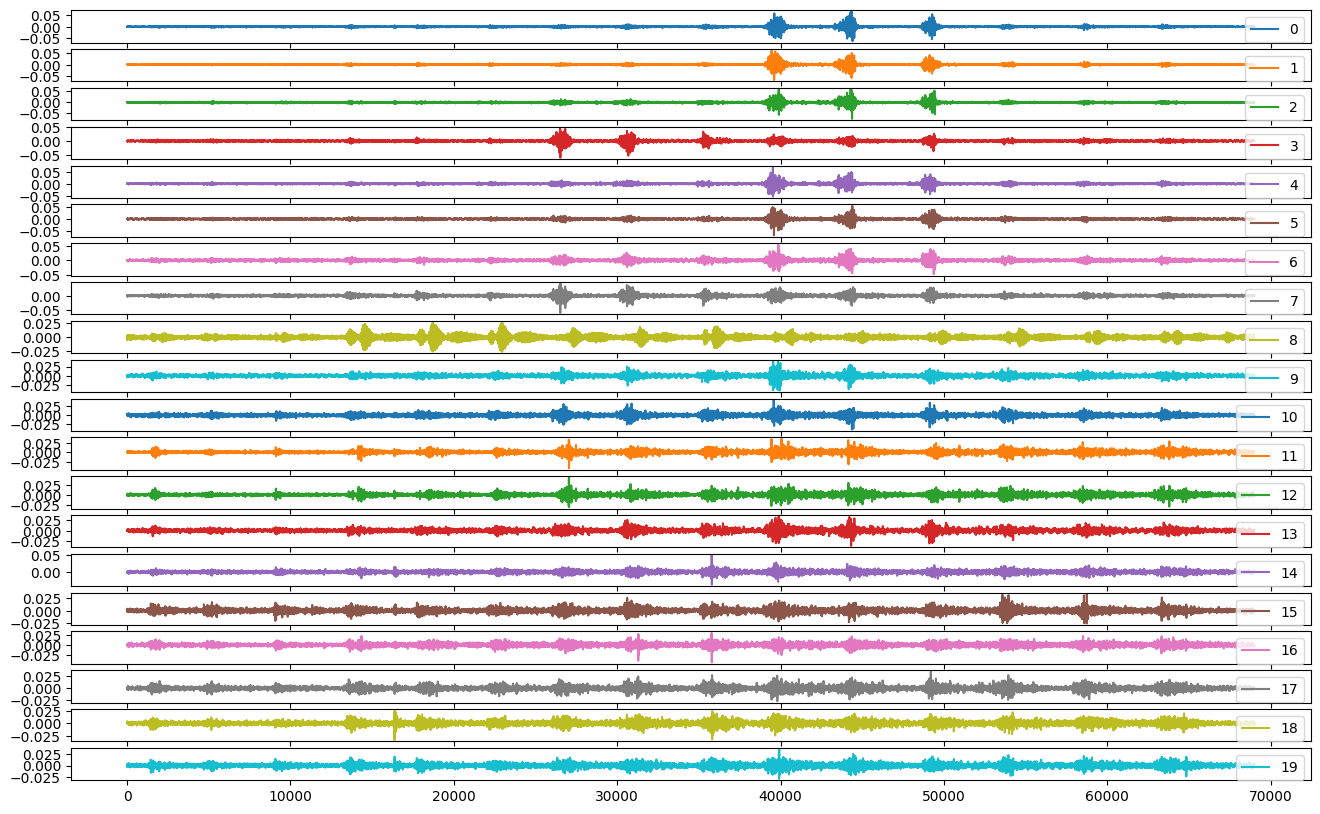

In [492]:
df_mu_flex = pd.DataFrame(mu_flex )
df_mu_flex.iloc[:, :20].plot(subplots=True)

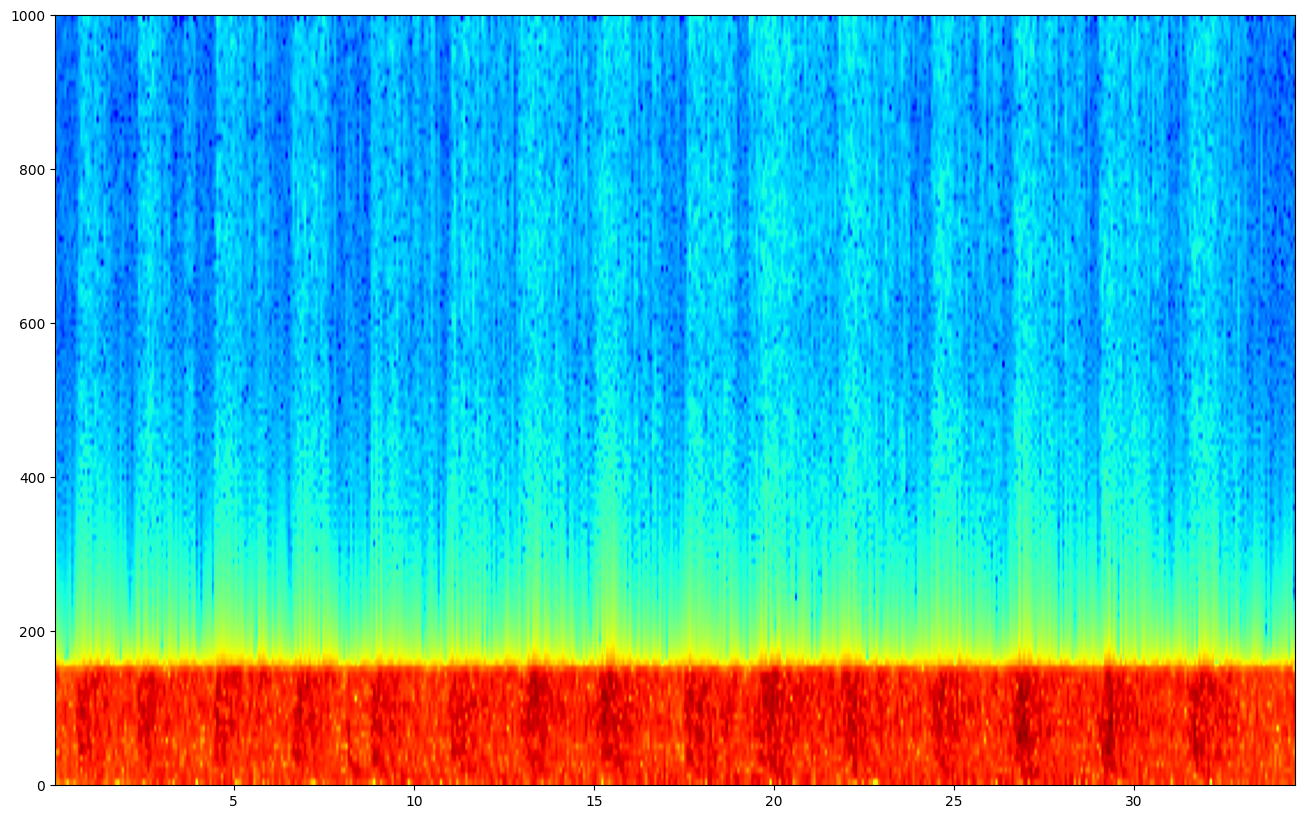

In [361]:
_, _ ,_, _ = plt.specgram(mu_flex[:, 15], Fs=2000, cmap = 'jet', mode='magnitude')

C:\Users\naoki\AppData\Local\Temp\ipykernel_26640\3969206274.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, frq, Pxx, cmap = 'jet')


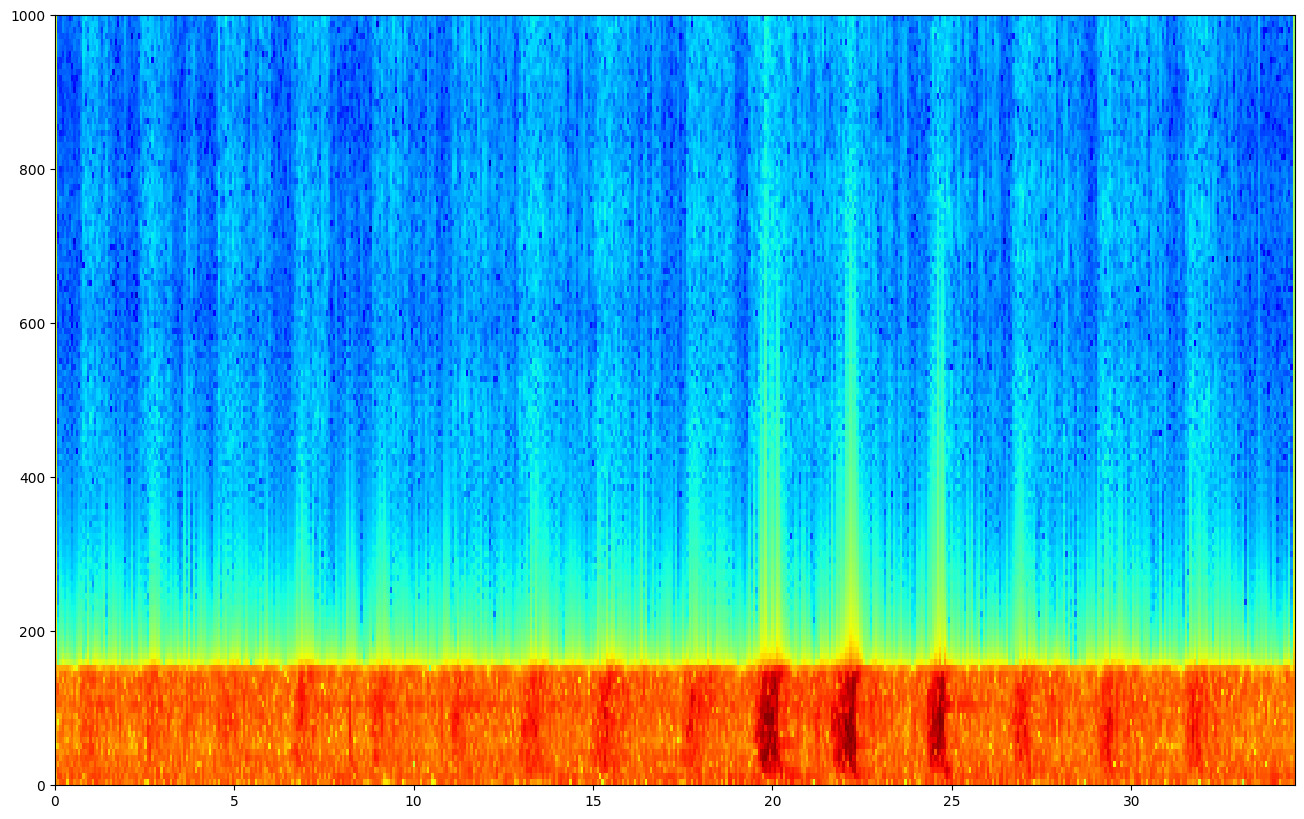

In [362]:
from scipy import signal
fs= 2000

frq, t, Pxx = signal.stft(mu_flex[:, 0], fs=fs) #周波数、時間、強さの3つの情報が帰ってくる
Pxx = 10 * np.log(np.abs(Pxx)) #対数表示に直す
plt.pcolormesh(t, frq, Pxx, cmap = 'jet')

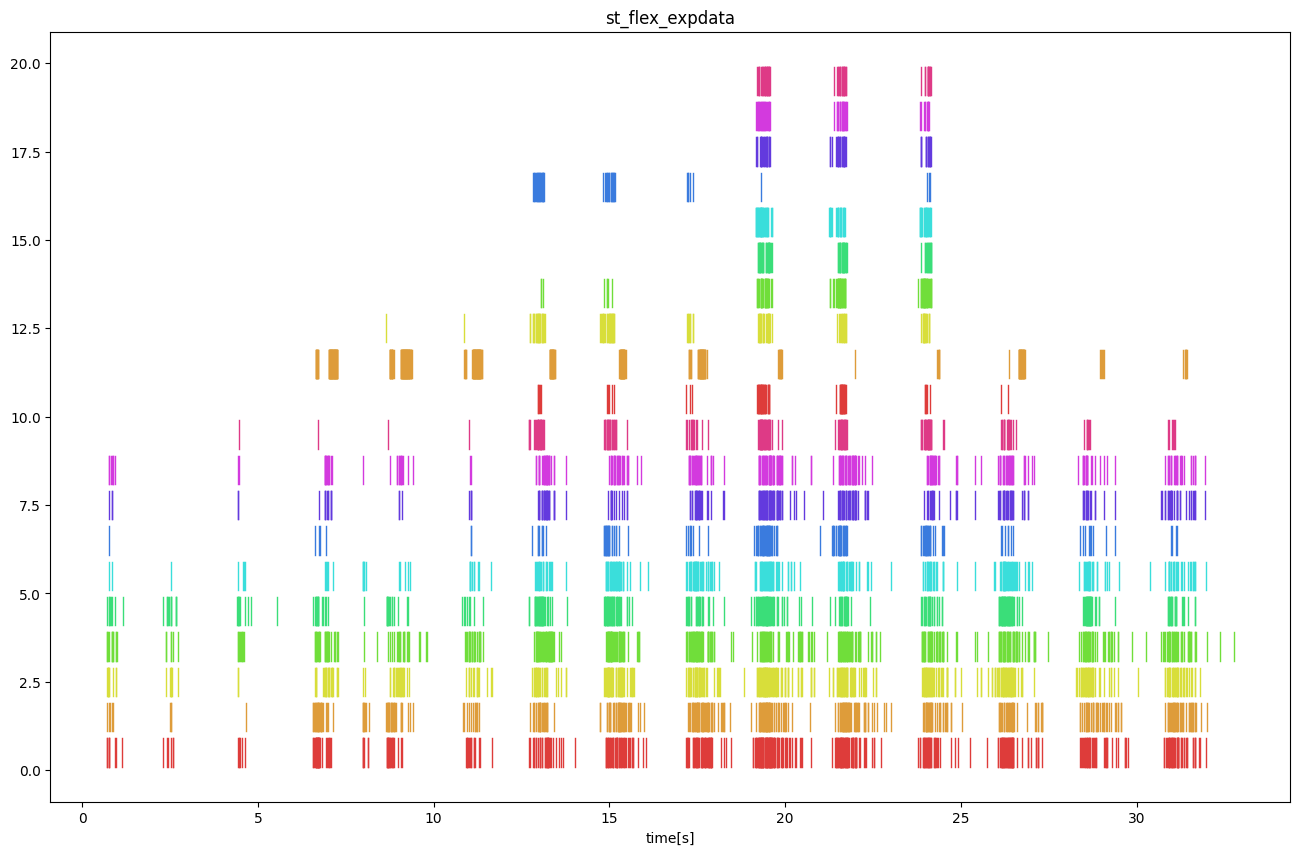

In [497]:
plot_spikes(st_flex[:, :20][:, ::-1], title='st_flex_expdata')

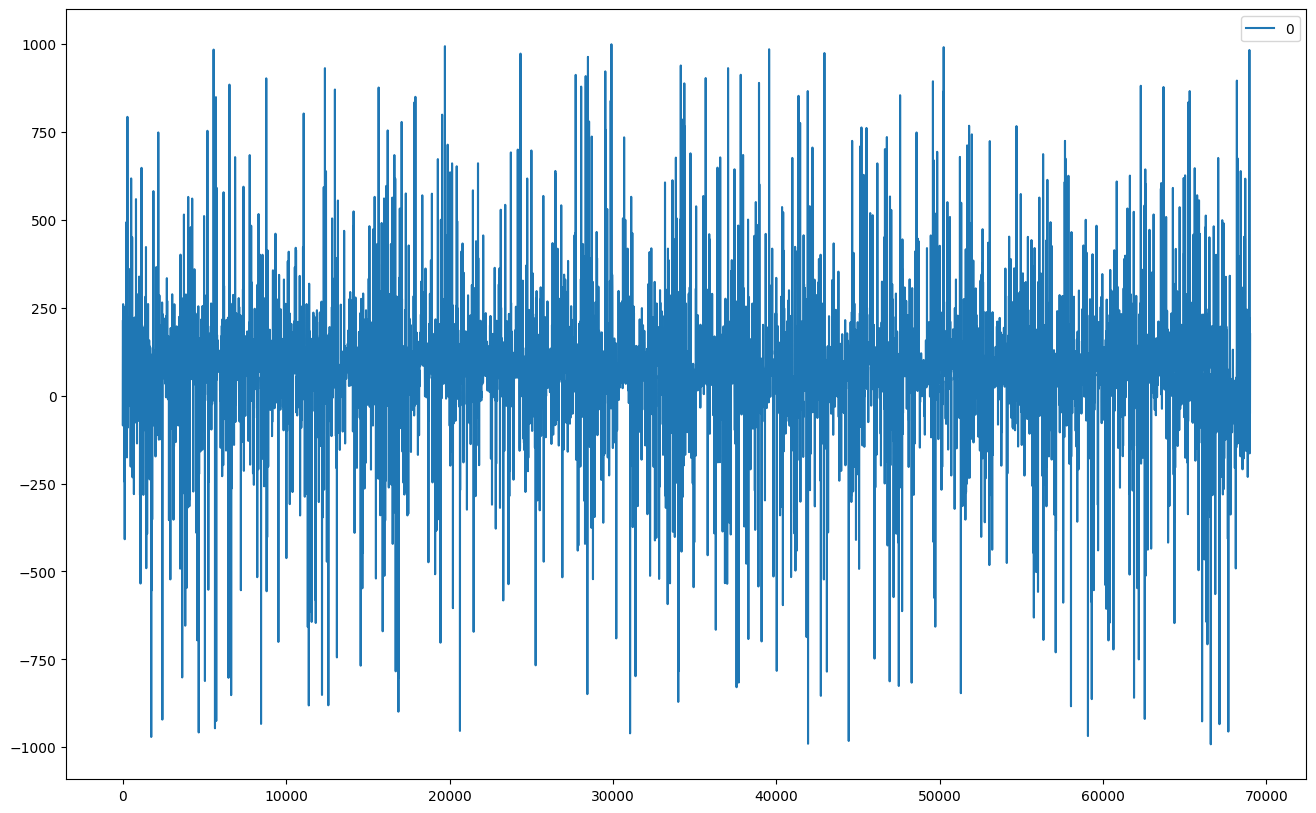

In [364]:
from scipy import signal
fs = 2000

z = signal.hilbert(mu_flex[:, 0])
phase = np.unwrap(np.angle(z))
frq = np.diff(phase) / (2 * np.pi) * fs
df_tmp = pd.DataFrame(frq).plot()